In [8]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_model

In [9]:
env_path = 'no-x/Wave'

In [10]:
env = wave.WaveEnv(env_path)

WAVE environment created.


In [11]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 256
ppo_epochs = 10
clip = 0.2
minibatch_size = 64
model = ppo_model.PPO(126, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip)

In [12]:
save_path = f'./results/test/no_x_256_10_0.2_64'
model.set_model_save_path(save_path)

In [ ]:
model.load_model()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


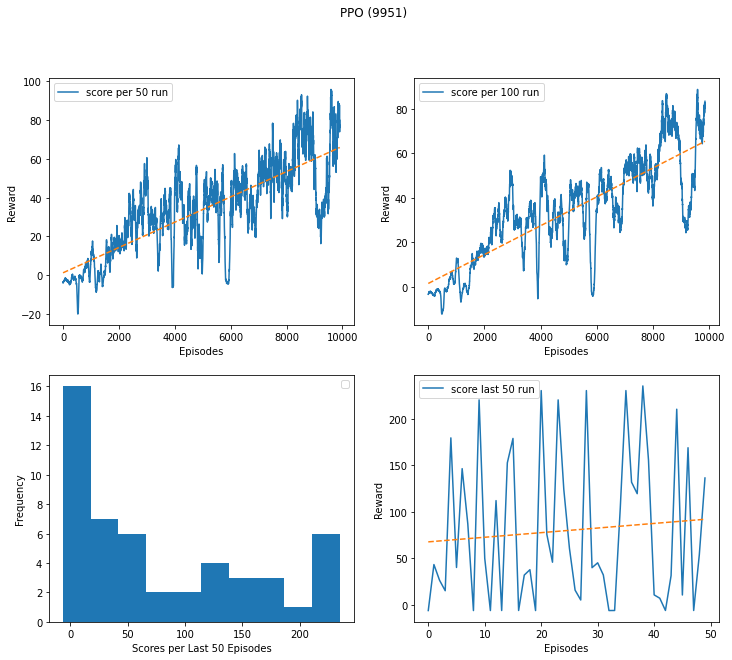

EPOCH: 9950, total reward: 136.1199816763401, timestep: 678, lr: 1.350851717672993e-05
EPOCH: 9951, total reward: 199.84997564554214, timestep: 903, lr: 1.350851717672993e-05
EPOCH: 9952, total reward: 36.22999478876591, timestep: 176, lr: 1.350851717672993e-05
EPOCH: 9953, total reward: -1.2200009524822235, timestep: 125, lr: 1.350851717672993e-05
EPOCH: 9954, total reward: 36.92999389767647, timestep: 262, lr: 1.350851717672993e-05
EPOCH: 9955, total reward: 70.53999248147011, timestep: 390, lr: 1.350851717672993e-05
EPOCH: 9956, total reward: -6.189999893307686, timestep: 24, lr: 1.350851717672993e-05
EPOCH: 9957, total reward: 10.589997828006744, timestep: 89, lr: 1.350851717672993e-05
EPOCH: 9958, total reward: 76.86999137699604, timestep: 463, lr: 1.350851717672993e-05
EPOCH: 9959, total reward: -6.200000122189522, timestep: 24, lr: 1.350851717672993e-05
EPOCH: 9960, total reward: 94.29998886585236, timestep: 514, lr: 1.350851717672993e-05
EPOCH: 9961, total reward: 45.6499942243

In [13]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 10000, show_plot=True)

In [14]:
model.save_model()

Model saved
Training history saved


In [ ]:
save_path

In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

In [ ]:
import plot
plot.smooth_values(model.train_losses, 100)

In [ ]:
model.plot_train_memory(smooth=100)

In [ ]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

In [ ]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

In [36]:
env.close()